# Dimensionality reduction

## Introduction

__Dimensionality reduction methods__ seek to take a large set of variables and return a smaller set of __components__ that still contain most of the information in the original dataset. This implies an inherent tradeoff between _information loss_ and _improved interpretability_: all dimensionality reduction methods discard some information, but they also play an important role in helping us make sense of a giant matrix of values.

We already saw one example of dimensionality reduction in PCA. Let's look at two other common approaches to dimensionality reduction: tSNE and UMAP. 

## Load data
We'll continue working with our normalized mouse brain data:

In [1]:
import scanpy as sc

adata = sc.read('../data/brain_normalized.h5ad')

## tSNE 

An alternative to PCA for visualizing scRNASeq data is a tSNE plot. [tSNE](https://lvdmaaten.github.io/tsne/) (t-Distributed Stochastic Neighbor Embedding) combines dimensionality reduction (e.g. PCA) with random walks on the nearest-neighbour network to map high dimensional data (i.e. our 18,585 dimensional expression matrix) to a 2-dimensional space. In contrast with PCA, tSNE can capture nonlinear structure in the data, and tries to preserve the _local_ distances between cells. Due to the non-linear and stochastic nature of the algorithm, tSNE is more difficult to intuitively interpret: while tSNE faithfully represents _local_ relationships, it doesn't always capture the relatioships between more distant cells correctly. 

tSNE is a stochastic algorithm which means running the method multiple times on the same dataset will result in different plots. To ensure reproducibility, we fix the "seed" of the random-number generator in the code below so that we always get the same plot. 

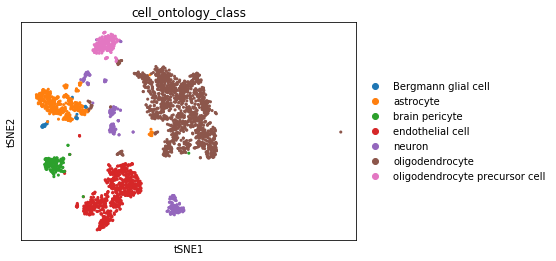

In [3]:
sc.tl.tsne(adata, perplexity=30, learning_rate=1000, random_state=0)

sc.pl.tsne(adata, color='cell_ontology_class')

Here, we see that tSNE generally does a good job of grouping similar cell types together (much better than PCA alone), but there are still some neurons that are not grouped together. 

### Exercise  

tSNE has two main parameters: the `perplexity` and `learning rate`. Above, we used the default values provided by SCANPY, but we need to investigate how these parameters are influencing our results. 

Visit [this demo](https://distill.pub/2016/misread-tsne/) to learn more about how these parameters can effect tSNE results. Then try out a few different parameter combinations on this data (remember to fix the `random_state=0` for reproducibility). What values do you think are most appropriate? Why?

In [ ]:
help(sc.tl.tsne)
help(sc.pl.tsne)

## UMAP

UMAP (Uniform Approximation and Projection) is another nonlinear dimensionality reduction method. Like tSNE, UMAP is nondeterministic and requires that we fix the random seed to ensure reproducibility. While tSNE optimizes for local structure, UMAP tries to balance the preservation of local and global structure. For this reason, we prefer UMAP over tSNE for exploratory analysis and general visualization. 

UMAP is based upon the __neighbor graph__, which we'll talk about later in the clustering lesson.

In [10]:
sc.pp.neighbors(adata) # UMAP is based on the neighbor graph; we'll compute this first
sc.tl.umap(adata, min_dist=0.5, spread=1.0, random_state=1, n_components=2)

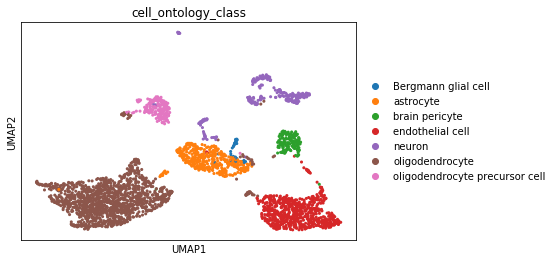

In [11]:
sc.pl.umap(adata, color='cell_ontology_class')

Here, we see that UMAP generally does a a better job of grouping like cells together and achieving clean separation between cell types. Try coloring by tissue: what do you observe?

### Exercise  

As implemented in scanpy, UMAP has two main parameters: the `min_dist` and `spread`. Above, we used the default values provided by SCANPY, but we need to investigate how these parameters are influencing our results. 

Try out a few different parameter combinations on this data (remember to fix the `random_state=0` for reproducibility). What values do you think are most appropriate? Why? 

In [ ]:
sc.tl.umap(..., min_dist= , spread= , random_state=1, n_components=2)
sc.pl.umap()

Let's save our anndata object with our new embeddings to file for later use.

In [11]:
adata.write('../data/brain_embeddings.h5ad')